In [5]:
import pandas as pd

df = pd.read_csv('../data/data_nlp_A.csv', parse_dates=['last_publish_date', 'date_min'])

In [6]:
columns_numerical = df.select_dtypes(include=['number']).columns.tolist()
columns_categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()
columns_boolean = df.select_dtypes(include=['bool']).columns.tolist()

In [8]:
columns_vertex_adopted =[
    'urls_per_days',
    'media_type', # instead of 'Autmedia_type_videohors'
    'word_count',
    'video_player_types', # instead of encoded/transformed 'video_standard_and_widget' and 'video_widget'
    'classification_product',
    # 'video_widget', # commented out, see comment in line 'video_standard_and_widget' and 'video_widget'
    'meta_title_len',
    'author_list',  # instead of 'Authors'
    'google_trend_label',
    'classification_type',
    'meta_desc_len',
    'google_trend_score',
    'abstract_len',
    'h1_len'
    ]


target = 'external_impressions' #'ctr'

data = df[columns_vertex_adopted + [target]]

In [9]:
from pycaret.regression import *

s = setup(data, target=target, session_id=42, transformation=True, 
          # transform_target=True, 
          #  transform_target_method='yeo-johnson', 
          ) #‘yeo-johnson’ in fact lol

,Description,Value
0,Session id,42
1,Target,external_impressions
2,Target type,Regression
3,Original data shape,"(6815, 14)"
4,Transformed data shape,"(6815, 40)"
5,Transformed train set shape,"(4770, 40)"
6,Transformed test set shape,"(2045, 40)"
7,Numeric features,7
8,Categorical features,6
9,Rows with missing values,14.6%


In [16]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:00:49
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,766589.0422,6062384075505.5771,2205982.5818,0.1345,2.8440,155.7140,0.0560
en,Elastic Net,724090.0134,6081828271773.7480,2210773.0286,0.1297,2.7575,121.9253,0.0770
lasso,Lasso Regression,818790.9909,6118588429545.1543,2221072.1332,0.1193,2.9688,207.0082,0.0730
llar,Lasso Least Angle Regression,818784.7052,6118577878901.6455,2221067.1332,0.1193,2.9689,206.9986,0.0560
lightgbm,Light Gradient Boosting Machine,677796.1427,6308384433602.3662,2304332.8426,0.0038,2.3826,153.7702,0.9400
dummy,Dummy Regressor,800594.5688,6704922217676.7998,2347041.3125,-0.0021,3.2705,260.0342,0.0610
omp,Orthogonal Matching Pursuit,802597.3343,6671045499610.8311,2344095.1345,-0.0021,3.2380,254.9754,0.0530
lr,Linear Regression,802747.1734,6672536843649.2715,2344461.6648,-0.0024,3.2374,254.3553,0.0680
par,Passive Aggressive Regressor,773874.8387,7247867828155.6338,2477844.6218,-0.1865,3.1469,135.7419,0.0720
et,Extra Trees Regressor,665729.8499,7231051543942.1611,2481132.7384,-0.1879,1.9779,49.0601,0.2800


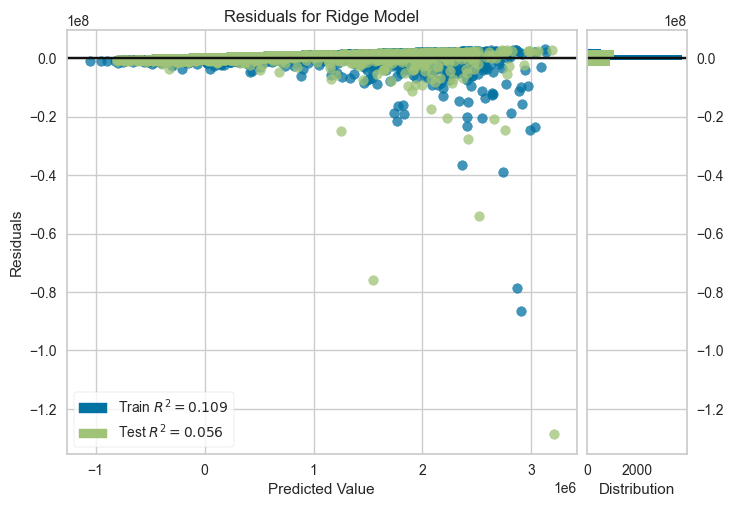

In [11]:
plot_model(best, plot = 'residuals')

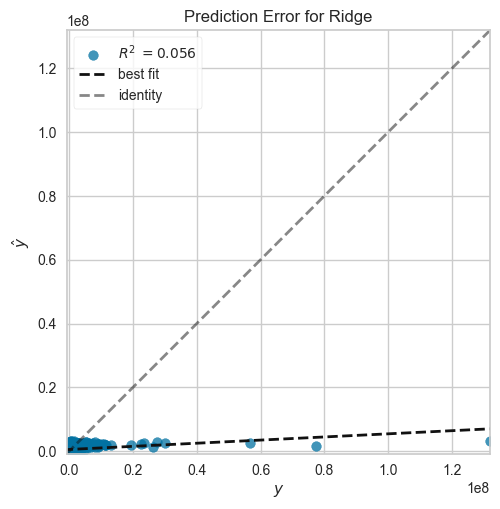

In [12]:
plot_model(best, plot='error')

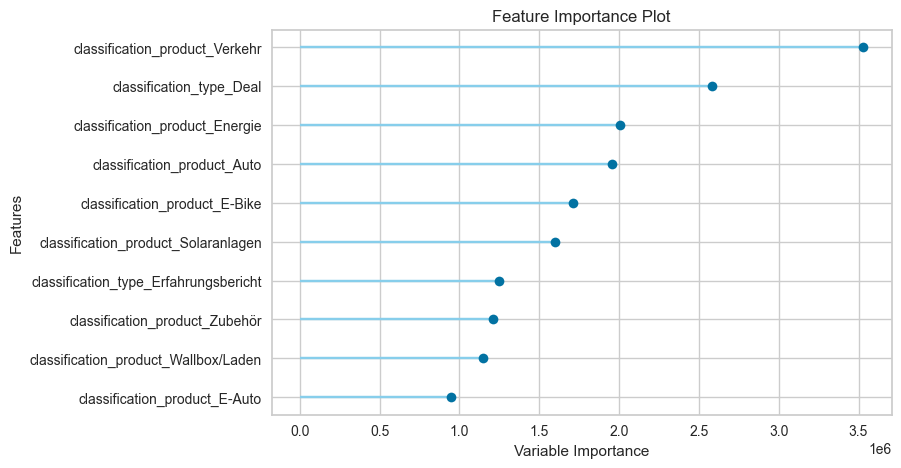

In [13]:
plot_model(best, plot = 'feature')

In [14]:
save_experiment('../models/bl_experiment_ctr.pkl')

In [15]:
save_model(model=best, model_name='../models/bl_ctr')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['urls_per_days', 'word_count',
                                              'meta_title_len', 'meta_desc_len',
                                              'google_trend_score',
                                              'abstract_len', 'h1_len'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['media_type', 'video_player_types',
                                              'classification_product',
                                              'author_...
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['author_list',
                           